In [1]:
import yfinance as yf

def load_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
    
    # Print available columns
    print("Available Columns:", data.columns)

    # Extract 'Close' prices correctly
    close_prices = data.xs('Close', level='Price', axis=1)  # Fetch 'Close' across tickers

    return close_prices

# Example usage
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

data = load_data(tickers, start_date, end_date)
print("Data Loaded")
print(data.head())  # Display first rows


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Available Columns: MultiIndex([('TSLA',   'Open'),
            ('TSLA',   'High'),
            ('TSLA',    'Low'),
            ('TSLA',  'Close'),
            ('TSLA', 'Volume'),
            ( 'BND',   'Open'),
            ( 'BND',   'High'),
            ( 'BND',    'Low'),
            ( 'BND',  'Close'),
            ( 'BND', 'Volume'),
            ( 'SPY',   'Open'),
            ( 'SPY',   'High'),
            ( 'SPY',    'Low'),
            ( 'SPY',  'Close'),
            ( 'SPY', 'Volume')],
           names=['Ticker', 'Price'])
Data Loaded
Ticker           TSLA        BND         SPY
Date                                        
2015-01-02  14.620667  62.387074  172.592865
2015-01-05  14.006000  62.568214  169.475906
2015-01-06  14.085333  62.749409  167.879623
2015-01-07  14.063333  62.787151  169.971588
2015-01-08  14.041333  62.689022  172.987762


c:\Users\Semir AI Legend\portfolio-optimization\scripts\financial_analysis.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')
c:\Users\Semir AI Legend\portfolio-optimization\scripts\financial_analysis.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')  # Ensure no remaining NaNs


Missing Values:
 Ticker
TSLA    0
BND     0
SPY     0
dtype: int64
Summary Statistics:
 Ticker         TSLA          BND          SPY
count   2535.000000  2535.000000  2535.000000
mean     117.848209    69.083445   316.067402
std      116.508288     4.777898   117.926910
min        9.578000    61.676994   156.800842
25%       17.228000    65.370350   214.841980
50%       30.298000    68.125977   277.117889
75%      221.525002    72.663258   405.869186
max      479.859985    78.588936   609.750000


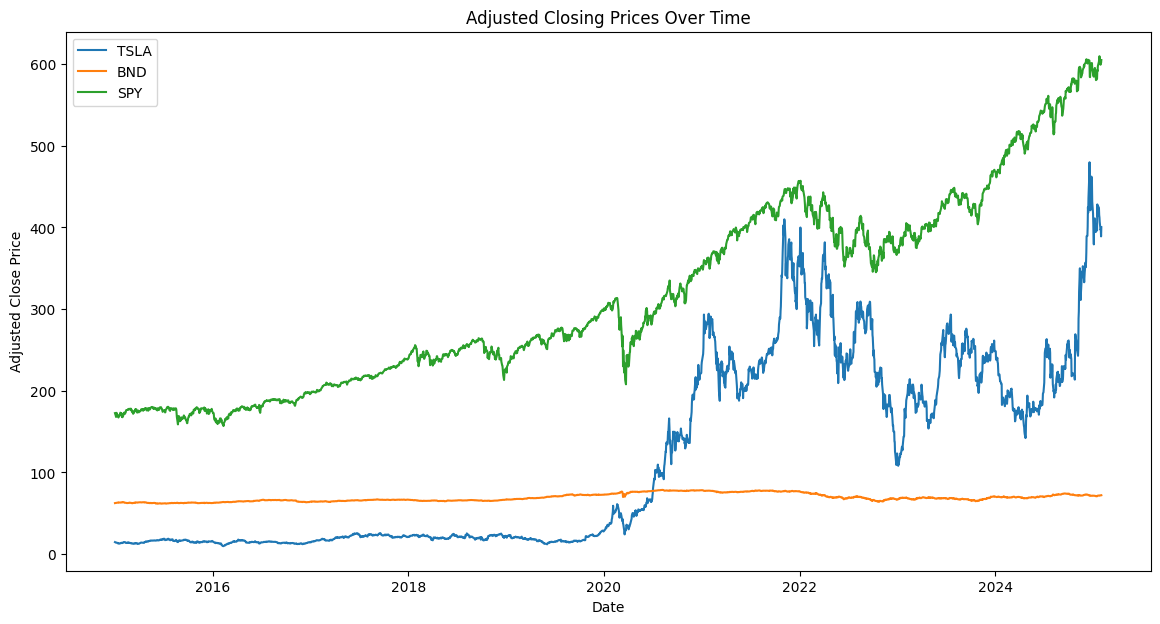

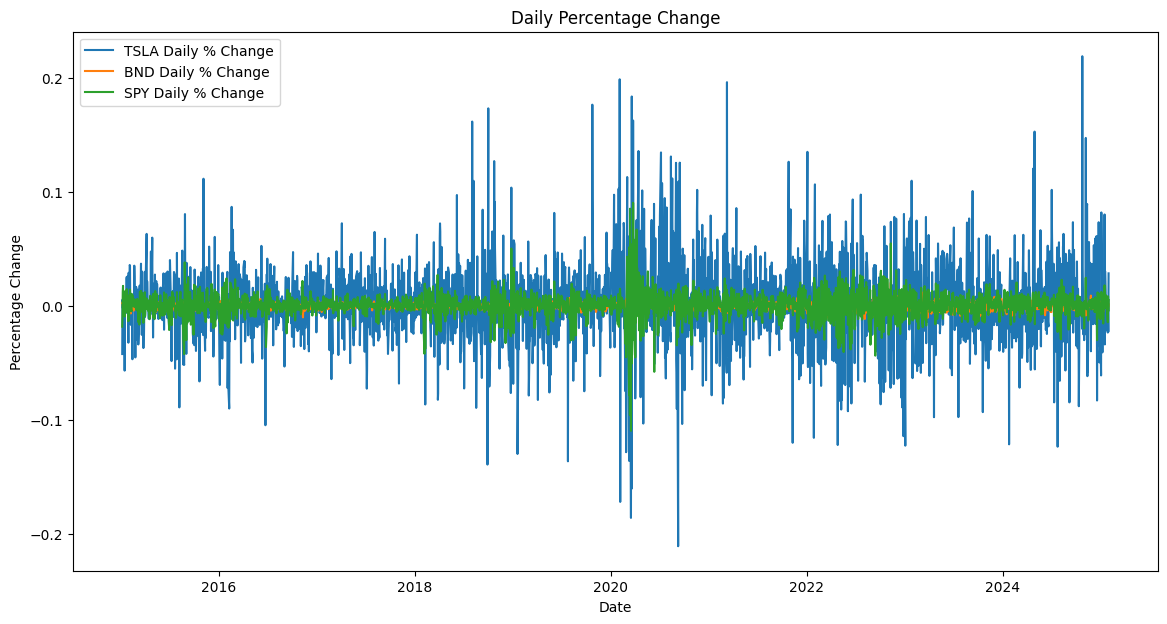

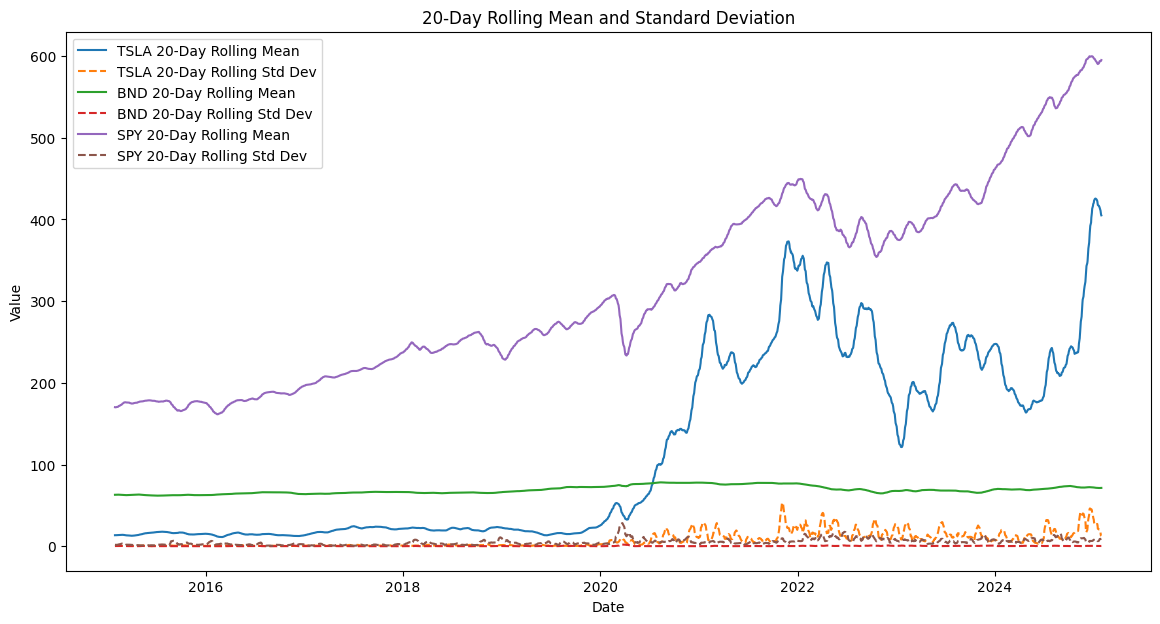

Outliers:
       TSLA  BND  SPY
0      NaN  NaN  NaN
1      NaN  NaN  NaN
2      NaN  NaN  NaN
3      NaN  NaN  NaN
4      NaN  NaN  NaN
...    ...  ...  ...
2529   NaN  NaN  NaN
2530   NaN  NaN  NaN
2531   NaN  NaN  NaN
2532   NaN  NaN  NaN
2533   NaN  NaN  NaN

[2534 rows x 3 columns]


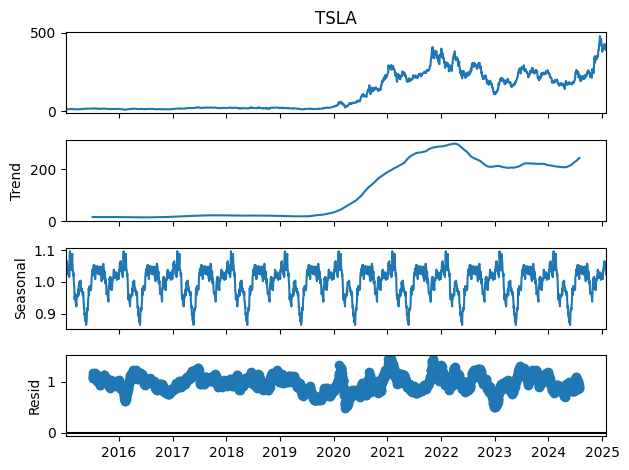

Value at Risk (5% confidence):
 Ticker
TSLA   -0.051387
BND    -0.004801
SPY    -0.016719
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
TSLA    0.052014
BND    -0.004955
SPY     0.043078
dtype: float64


In [2]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)

In [3]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")

[*********************100%***********************]  3 of 3 completed
C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\1476778701.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


Data saved as cleaned_financial_data.csv


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\916654350.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='ffill')  # forward fill
C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\916654350.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='bfill')  # backward fill


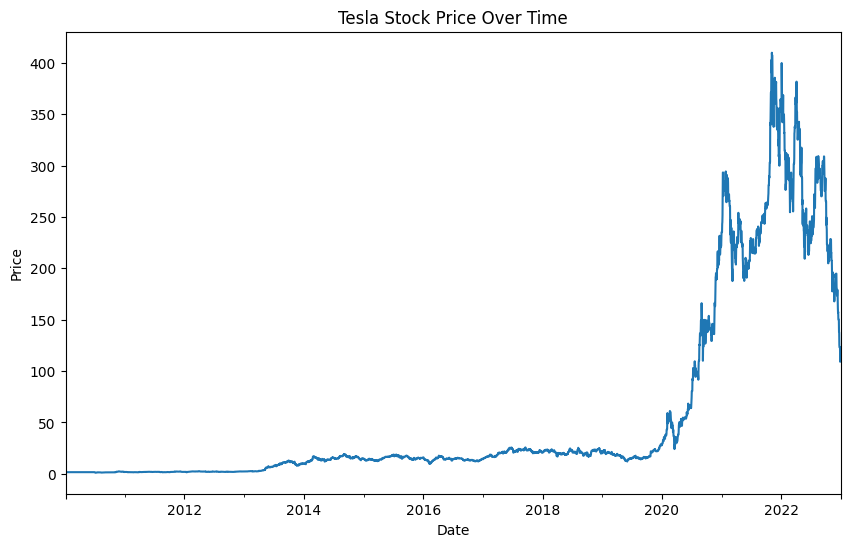

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense  

data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
tsla_data.index = pd.to_datetime(tsla_data.index)
tsla_data = tsla_data.asfreq('D')  # or 'M' for monthly, 'H' for hourly, etc.
# Fill NaN values
tsla_data = tsla_data.fillna(method='ffill')  # forward fill
# or
tsla_data = tsla_data.fillna(method='bfill')  # backward fill
# or
tsla_data = tsla_data.fillna(0)  # fill with zero


# Split Data
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data[:train_size].astype(float).dropna()
test_data = tsla_data[train_size:].astype(float).dropna()
tsla_data =tsla_data

# Visualization
plt.figure(figsize=(10, 6))
tsla_data.plot()
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:


# Model Execution and Evaluation
try:
    mae_arima, rmse_arima, mape_arima = arima_model(train_data, test_data)
    if mae_arima:
        print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
except ValueError as e:
    print(f"Error: {e}")

mae_sarima, rmse_sarima, mape_sarima = sarima_model(train_data, test_data)
if mae_sarima is not None:
    print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")
else:
    print("SARIMA model could not be fitted due to an error.")

ARIMA - MAE: 176.64235494149378, RMSE: 192.60458898211837, MAPE: 72.02434463594818
SARIMA - MAE: 166.814087402646, RMSE: 182.42113467568916, MAPE: 67.89521447721229


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def prepare_lstm_data(data, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])
    
    X = np.array(X).reshape((len(X), look_back, 1))
    y = np.array(y)
    
    return X, y, scaler

train_X, train_y, scaler = prepare_lstm_data(train_data, look_back=60)
test_X, test_y, _ = prepare_lstm_data(test_data, look_back=60)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def lstm_model(train_data, test_data, look_back=60, epochs=10, batch_size=32):
    # Prepare the data
    X_train, y_train, scaler = prepare_lstm_data(train_data, look_back)
    X_test, y_test, _ = prepare_lstm_data(test_data, look_back)
    
    # Build the model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse scale the predictions and test data
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    # Return metrics and the model
    return mae, rmse, mape, model, scaler

# Call the function and unpack the results
mae_lstm, rmse_lstm, mape_lstm, model, scaler = lstm_model(train_data, test_data)
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}")

Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0110
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.4910e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.7020e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.7848e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.3911e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.1064e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.2175e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.2886e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.7415e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 2.7514e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
LSTM - MAE: 1.5737738446817298, RMSE: 2.1049357786287985, MAPE: 5.275661625453166


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Load the data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')

# Define train data (80% of the historical data)
train_data = tsla_data[:int(len(tsla_data) * 0.8)]

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\3822476349.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')


In [9]:
def forecast_arima(train_data, forecast_period=180, order=(5, 1, 0)):
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    return forecast_values, confidence_intervals
def forecast_sarima(train_data, forecast_period=180, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    return forecast_values, confidence_intervals
def forecast_lstm(model, data, scaler, look_back=60, forecast_period=180):
    # Prepare initial input for forecast generation
    inputs = data[-look_back:].values.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    forecast_values = []

    for _ in range(forecast_period):
        X_input = np.array(inputs[-look_back:]).reshape(1, look_back, 1)
        predicted_value = model.predict(X_input)
        forecast_values.append(predicted_value[0, 0])
        inputs = np.append(inputs, predicted_value)[-look_back:]

    # Inverse scale the forecast values
    forecast_values = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1)).flatten()
    
    return forecast_values

In [10]:
def forecast_and_analyze(train_data, model_type="arima", forecast_period=180, asset_name="Asset"):
    # Ensure the training data index is a DatetimeIndex
    train_data.index = pd.to_datetime(train_data.index)
    
    # Generate forecast with the specified model
    if model_type.lower() == "arima":
        forecast_values, confidence_intervals = forecast_arima(train_data, forecast_period)
    elif model_type.lower() == "sarima":
        forecast_values, confidence_intervals = forecast_sarima(train_data, forecast_period)
    elif model_type.lower() == "lstm":
        model, scaler = lstm_model(train_data, train_data)
        forecast_values = forecast_lstm(model, train_data, scaler, forecast_period=forecast_period)
        confidence_intervals = None

    # Set the forecast index starting from the day after the last date in training data
    forecast_start_date = train_data.index[-1]
    forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_period, freq='D')
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    # Plot historical data with the future forecast
    plt.figure(figsize=(14, 7))
    train_data.plot(label='Historical Data', color='blue')
    forecast_series.plot(label=f'Forecast ({model_type.upper()})', color='orange')

    # Plot confidence intervals if available
    if confidence_intervals is not None:
        plt.fill_between(forecast_index,
                         confidence_intervals.iloc[:, 0],
                         confidence_intervals.iloc[:, 1],
                         color='pink', alpha=0.3)

    plt.axvline(x=forecast_start_date, color='gray', linestyle='--', label="Forecast Start")
    plt.title(f'{model_type.upper()} Forecast for {asset_name} Stock Prices (Future Prediction)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Print analysis summary
    print("Forecast Summary:")
    
    if(model_type!='lstm'):
        trend_direction = "upward" if forecast_values.index[-1] > forecast_values.index[0] else "downward"
    else:
        trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
    print(f"Expected trend over the forecast period: {trend_direction}")

    if confidence_intervals is not None:
        print("Confidence intervals show the range of possible price fluctuations.")

        return {"forecast": forecast_series, "confidence_intervals": confidence_intervals}
    print("\nVolatility and Risk Analysis:")
    if confidence_intervals is not None:
        print("The forecast includes confidence intervals, indicating expected price fluctuation ranges.")
    else:
        print("Confidence intervals are unavailable for the LSTM model.")

    print("\nMarket Opportunities and Risks:")
    if trend_direction == "upward":
        print("Potential market opportunity due to an expected price increase.")
    else:
        print("Potential market risk due to an expected price decrease.")

    # Return forecast for further use
    return {"forecast": forecast_series, "confidence_intervals": confidence_intervals}

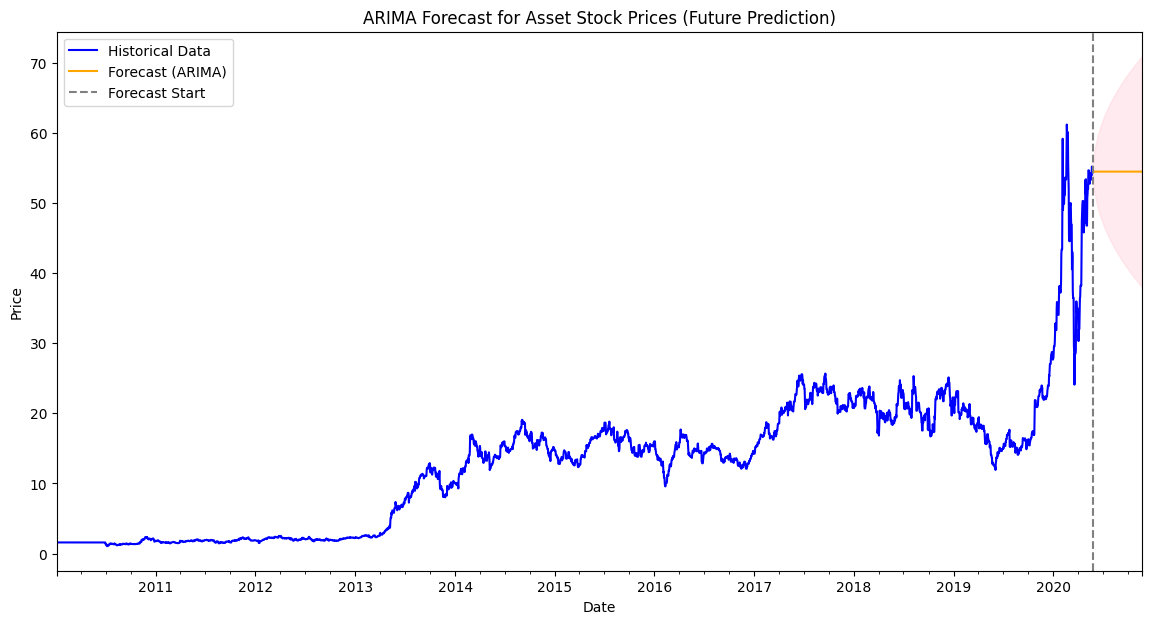

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


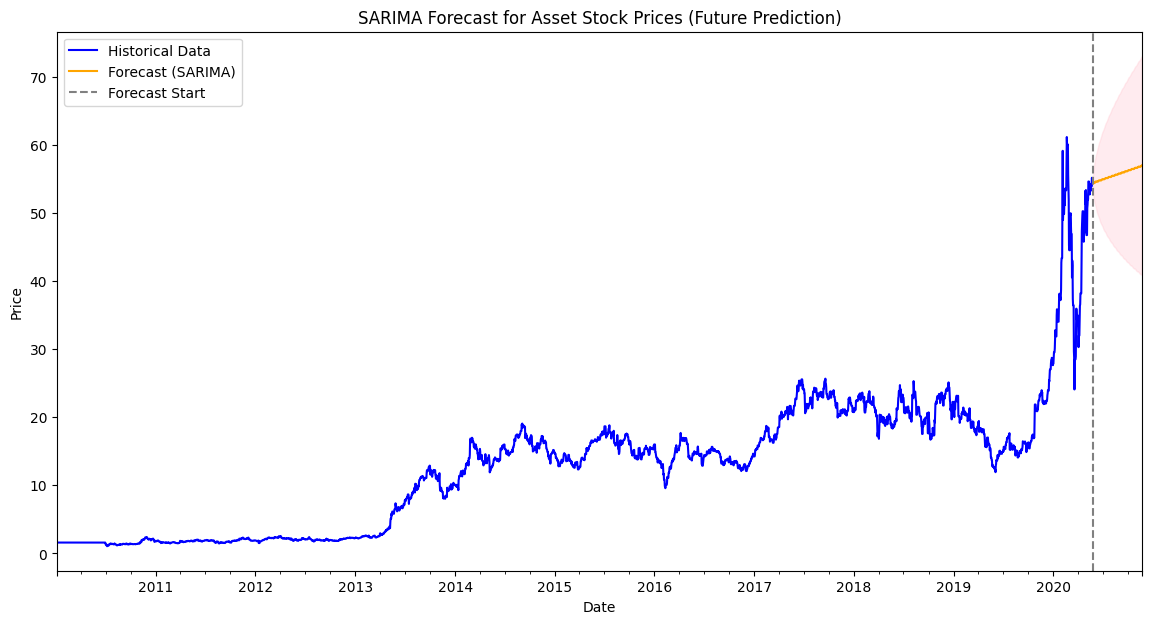

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0148
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.0781e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.3489e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7412e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8741e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2647e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1413e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6703e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9073e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5476e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

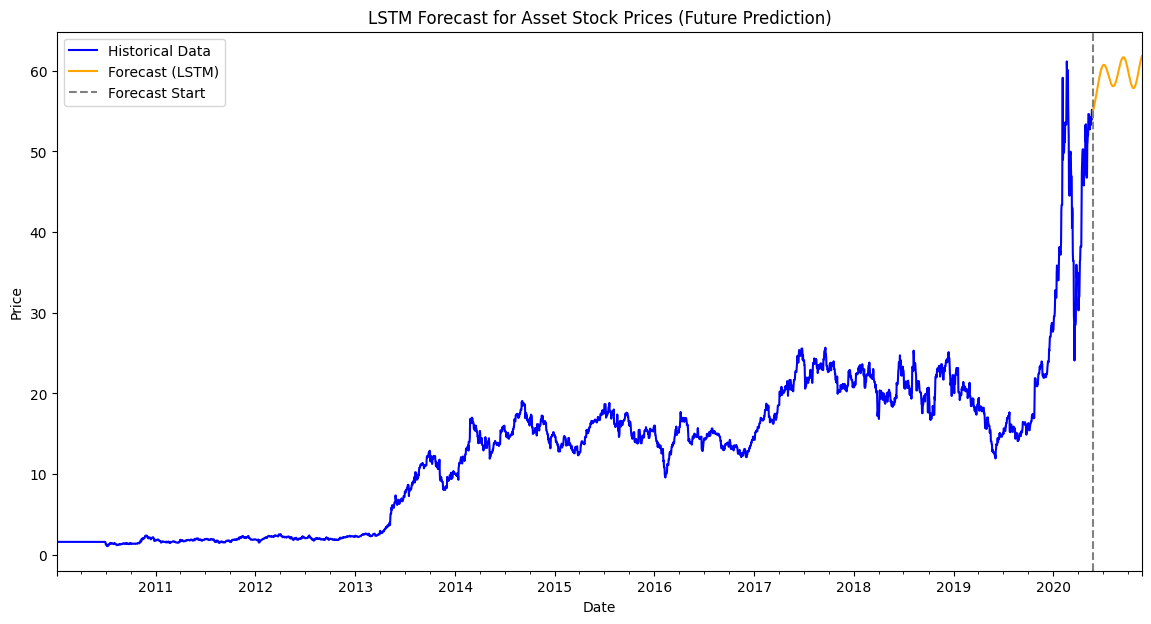

Forecast Summary:
Expected trend over the forecast period: upward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


{'forecast': 2020-05-25    55.051830
 2020-05-26    55.160206
 2020-05-27    55.293983
 2020-05-28    55.442894
 2020-05-29    55.601822
                 ...    
 2020-11-16    61.332191
 2020-11-17    61.468140
 2020-11-18    61.593121
 2020-11-19    61.706112
 2020-11-20    61.806229
 Freq: D, Length: 180, dtype: float32,
 'confidence_intervals': None}

In [11]:

def lstm_model(train_data, test_data, look_back=60, epochs=10, batch_size=32):
    X_train, y_train, scaler = prepare_lstm_data(train_data, look_back)
    X_test, y_test, _ = prepare_lstm_data(test_data, look_back)
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    
    return model, scaler  # Only return model and scaler

forecast_and_analyze(train_data, model_type="arima", forecast_period=180)

# Similarly, you can call SARIMA or LSTM forecasts
forecast_and_analyze(train_data, model_type="sarima", forecast_period=180)
forecast_and_analyze(train_data, model_type="lstm", forecast_period=180)

In [12]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
#data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")

Data saved as cleaned_financial_data.csv


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\91482498.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


ADF Statistic: -1.3682764504173135
p-value: 0.5973867944031246
Critical Values:
   1%: -3.43236865676297
   5%: -2.8624319215895935
   10%: -2.567244789154987
The series is likely non-stationary.
ADF Statistic: -10.074826087058907
p-value: 1.2316645913546159e-17
Critical Values:
   1%: -3.43236865676297
   5%: -2.8624319215895935
   10%: -2.567244789154987
The series is likely stationary.
ADF Statistic: -10.074826087058907
p-value: 1.2316645913546159e-17
Critical Values:
   1%: -3.43236865676297
   5%: -2.8624319215895935
   10%: -2.567244789154987
The series is likely stationary.
ADF Statistic: -10.074826087058907
p-value: 1.2316645913546159e-17
Critical Values:
   1%: -3.43236865676297
   5%: -2.8624319215895935
   10%: -2.567244789154987
The series is likely stationary.


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\2491179751.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\2491179751.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_24452\2491179751.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pr

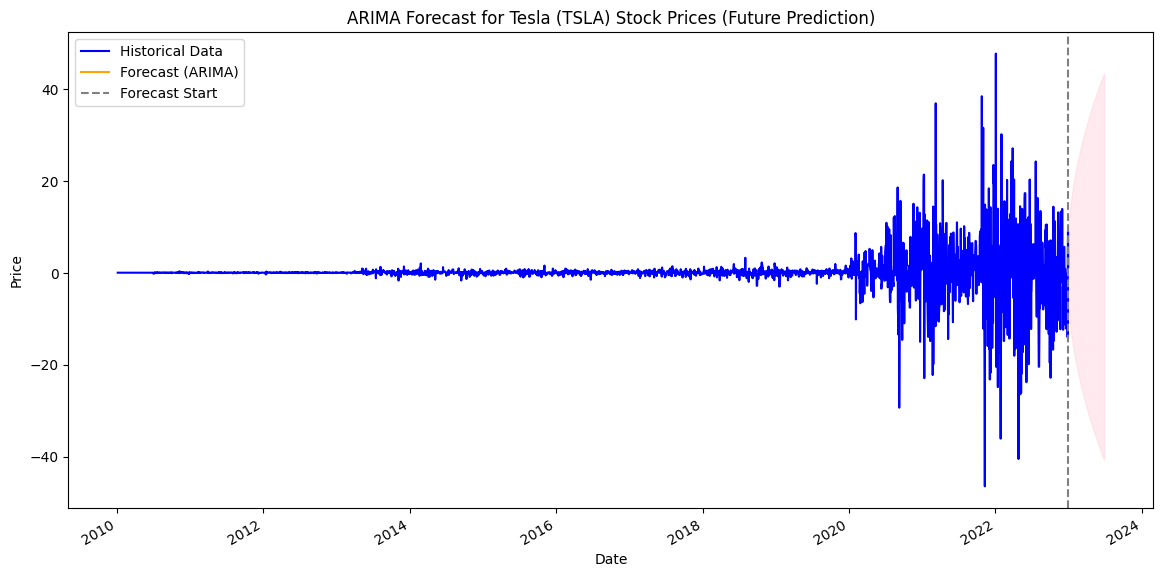

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next ver

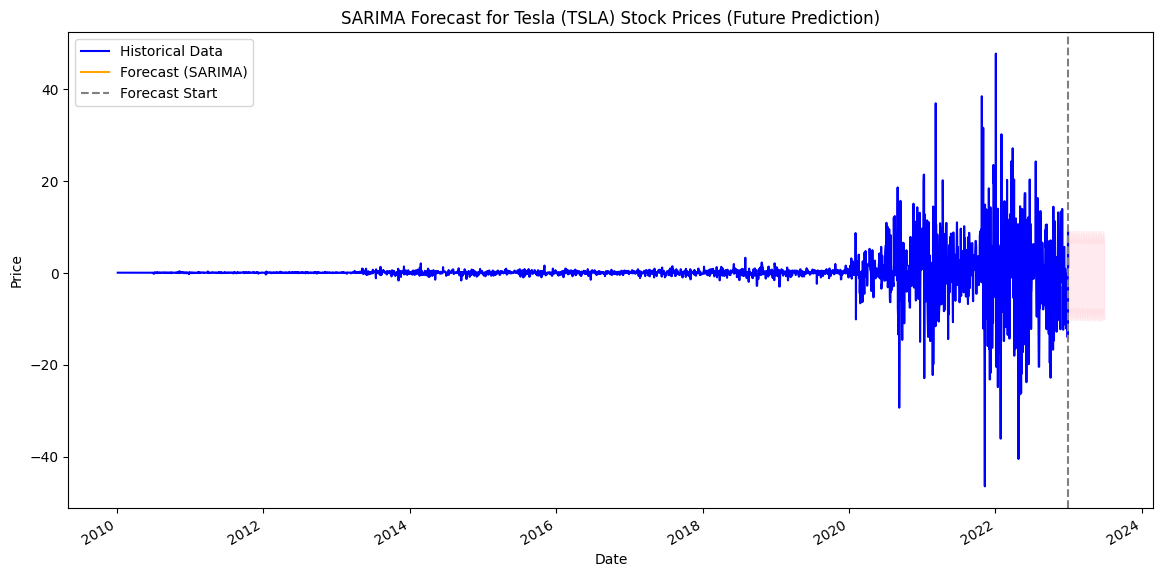

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0302
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0025
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0021
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0027
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0020
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0020
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0023
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0021
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

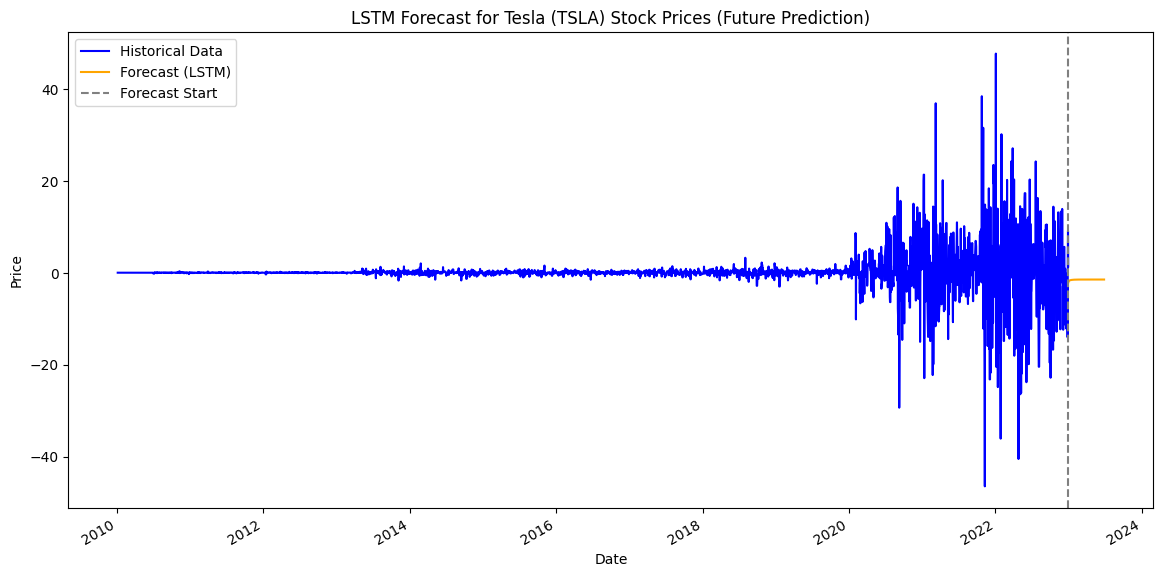

Forecast Summary:
Expected trend over the forecast period: upward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

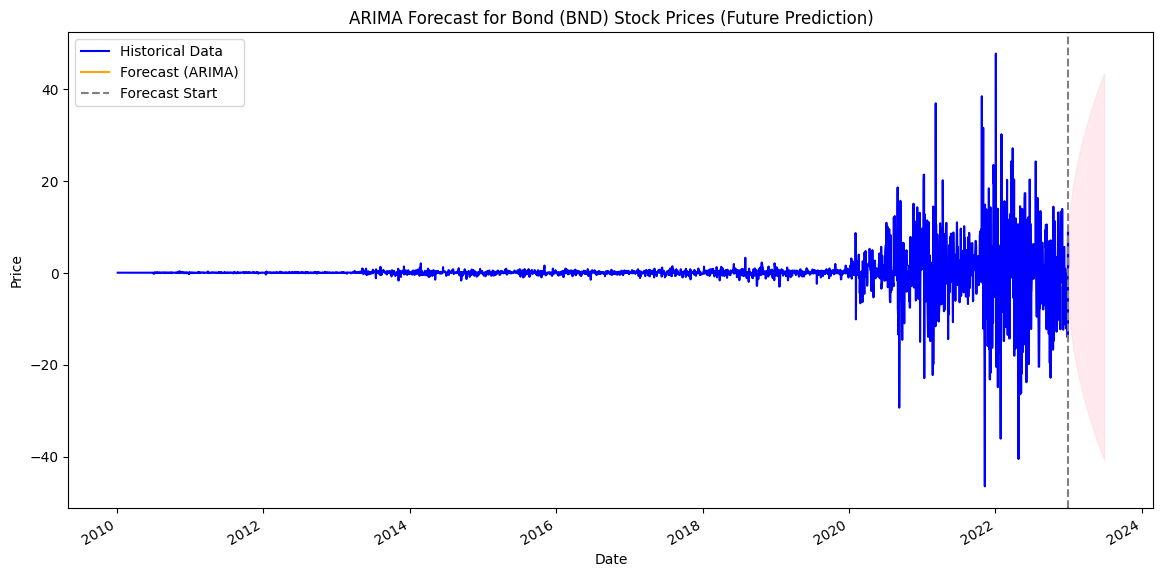

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next ver

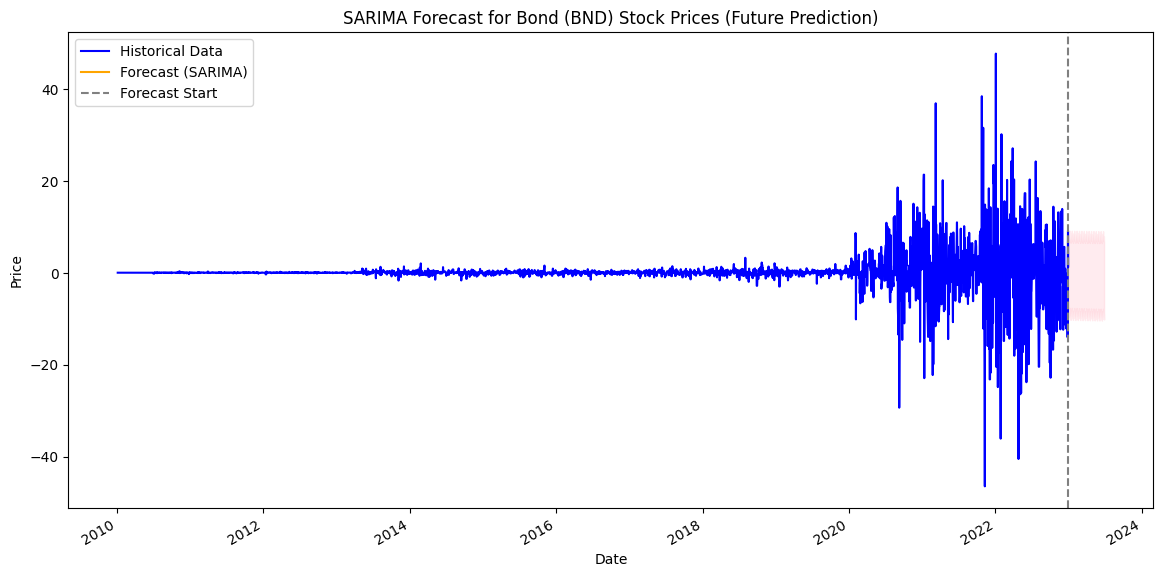

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0359
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0020
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0024
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0022
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0023
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0022
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0021
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0022
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

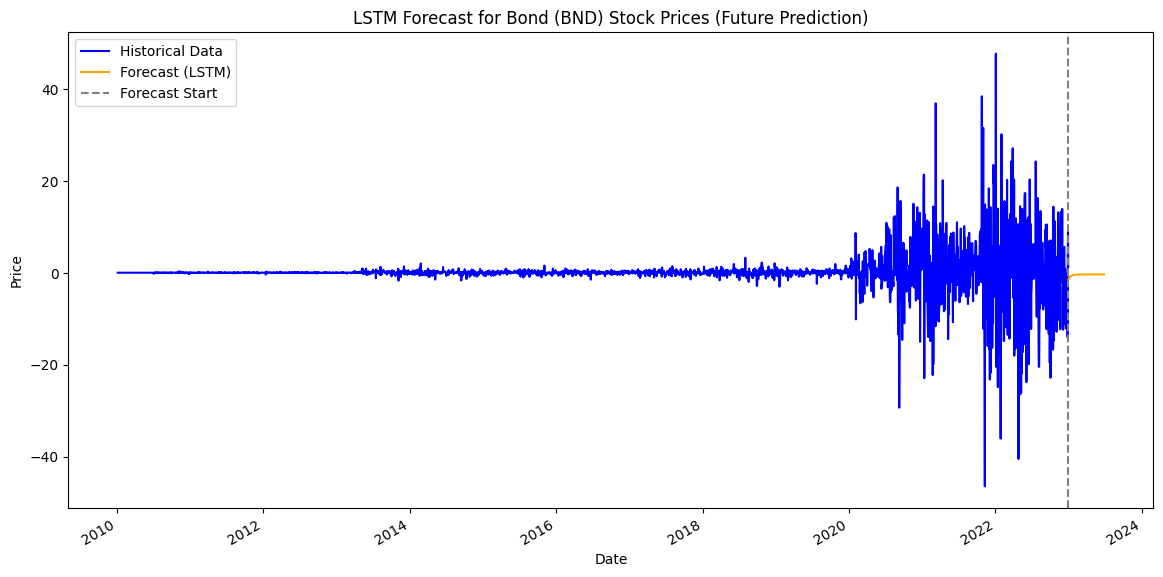

Forecast Summary:
Expected trend over the forecast period: upward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

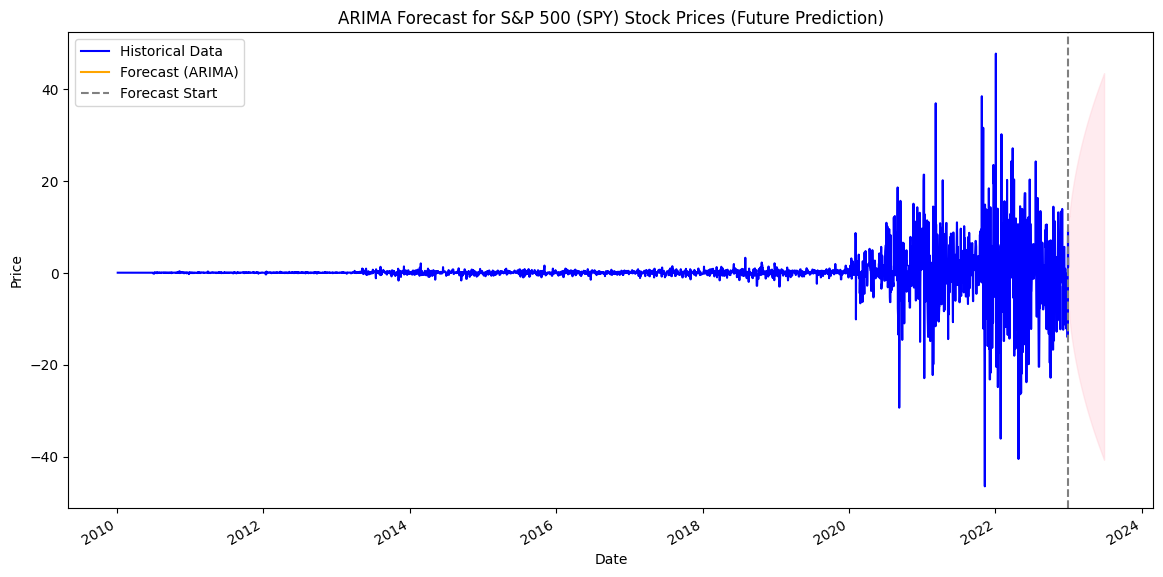

c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


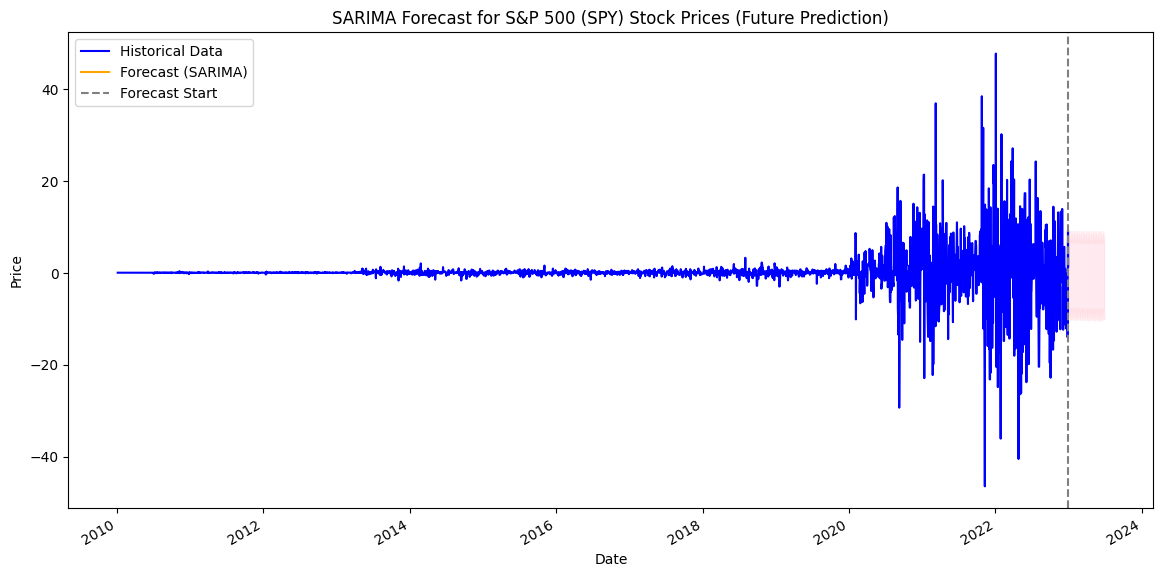

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0312
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0021
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0024
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0022
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0022
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0022
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0018
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0020
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0023
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

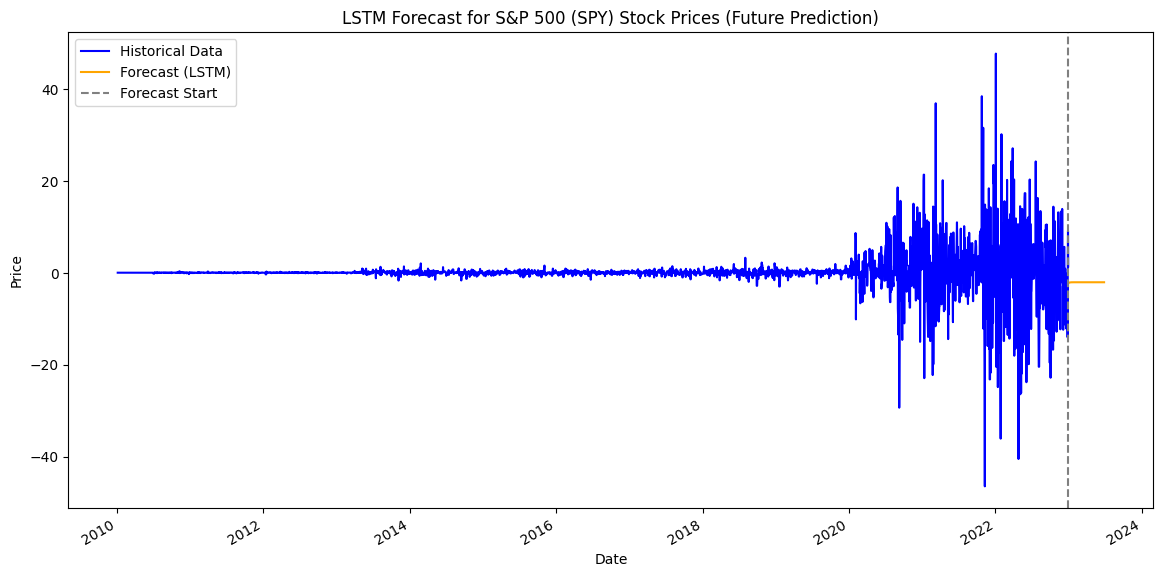

Forecast Summary:
Expected trend over the forecast period: upward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.
LSTM Forecast for TSLA completed.
LSTM Forecast for BND completed.
LSTM Forecast for SPY completed.
Forecast DataFrame:
                 TSLA       BND       SPY
2022-12-30 -2.199361 -1.672652 -2.388137
2022-12-31 -2.030817 -1.512680 -2.253080
2023-01-01 -1.921397 -1.381288 -2.190472
2023-01-02 -1.846261 -1.271556 -2.162173
2023-01-03 -1.791783 -1.178688 -2.148848


<Figure size 1000x600 with 0 Axes>

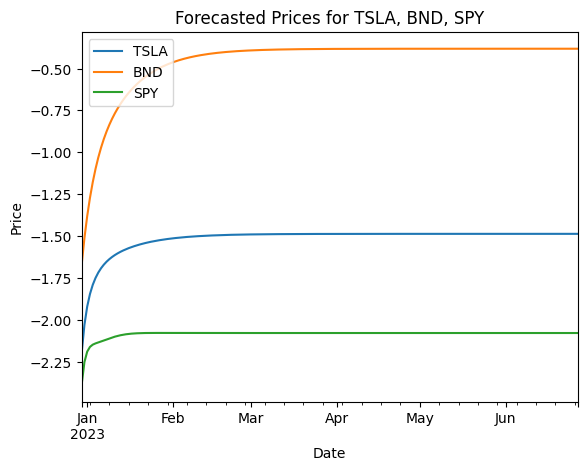

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Prepare Data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
bnd_data = data['BND']
spy_data = data['SPY']
check_stationarity(tsla_data) 
tsla_data_diff = tsla_data.diff().dropna()
bnd_data_diff = tsla_data.diff().dropna()
spy_data_diff = tsla_data.diff().dropna()
check_stationarity(tsla_data_diff) 
check_stationarity(bnd_data_diff)
check_stationarity(spy_data_diff) # Check stationarity again after differencing

# Convert to datetime and set frequency to daily
tsla_data_diff.index = pd.to_datetime(tsla_data_diff.index)
bnd_data_diff.index = pd.to_datetime(bnd_data_diff.index)
spy_data_diff.index = pd.to_datetime(spy_data_diff.index)
tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')

# Split Data (80% Train, 20% Test)
train_size = int(len(tsla_data_diff) * 0.8)
shared_train_dates = tsla_data_diff.sample(frac=0.8, random_state=42).sort_index().index

# Create train and test datasets for each asset using the same date range
train_data = tsla_data_diff.loc[shared_train_dates]
test_data = tsla_data_diff.drop(train_data.index)

train_data_bnd = bnd_data_diff.loc[shared_train_dates]
test_data_bnd = bnd_data_diff.drop(train_data.index)

train_data_spy = spy_data_diff.loc[shared_train_dates]
test_data_spy = spy_data_diff.drop(train_data.index)

# Forecast Period
forecast_period = 180

# Define a helper function to extract forecast
def extract_forecast(forecast_result, model_name, asset_name):
    if forecast_result is not None:
        print(f"{model_name} Forecast for {asset_name} completed.")
        return forecast_result['forecast']
    else:
        print(f"{model_name} Forecast for {asset_name} could not be generated.")
        return pd.Series([None] * forecast_period, index=pd.date_range(start=train_data.index[-1], periods=forecast_period, freq='D'))

# Generate Forecasts for each model and asset
arima_tsla = forecast_and_analyze(train_data, model_type="arima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
sarima_tsla = forecast_and_analyze(train_data, model_type="sarima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
lstm_tsla = forecast_and_analyze(train_data, model_type="lstm", forecast_period=forecast_period, asset_name="Tesla (TSLA)")

arima_bnd = forecast_and_analyze(train_data_bnd, model_type="arima", forecast_period=forecast_period, asset_name="Bond (BND)")
sarima_bnd = forecast_and_analyze(train_data_bnd, model_type="sarima", forecast_period=forecast_period, asset_name="Bond (BND)")
lstm_bnd = forecast_and_analyze(train_data_bnd, model_type="lstm", forecast_period=forecast_period, asset_name="Bond (BND)")

arima_spy = forecast_and_analyze(train_data_spy, model_type="arima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
sarima_spy = forecast_and_analyze(train_data_spy, model_type="sarima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
lstm_spy = forecast_and_analyze(train_data_spy, model_type="lstm", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")

# Extract the preferred forecasted prices for each asset
# Using LSTM model as specified
tsla_forecasted_prices = extract_forecast(lstm_tsla, "LSTM", "TSLA")
bnd_forecasted_prices = extract_forecast(lstm_bnd, "LSTM", "BND")
spy_forecasted_prices = extract_forecast(lstm_spy, "LSTM", "SPY")

# Combine these into a DataFrame for portfolio optimization
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices,
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})

# Convert 'None' values to NaN for compatibility and remove all-NaN columns
forecast_df = forecast_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Display the forecast data for verification
print("Forecast DataFrame:\n", forecast_df.head())


# Plot the forecasted data (if data exists)
if not forecast_df.empty:
    plt.figure(figsize=(10, 6))
    forecast_df.plot()
    plt.title('Forecasted Prices for TSLA, BND, SPY')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.show()
else:
    print("No valid forecast data to plot.")

Optimal Portfolio Weights: [1.39225764e-09 2.23474128e-10 9.99999998e-01]
Expected Portfolio Return: -0.19186762065166035
Portfolio Volatility (Risk): 0.07664923610965198
Sharpe Ratio: -2.503190251983472
95% Value at Risk for Tesla: -0.009333985


<Figure size 1200x800 with 0 Axes>

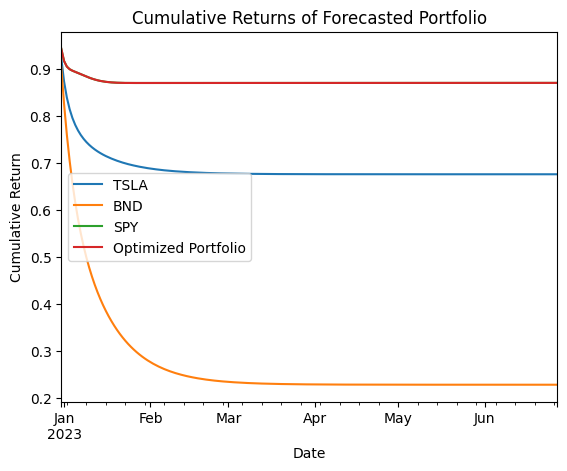

Summary of Portfolio Optimization:
 - Expected Annual Return: -0.19186762065166035
 - Portfolio Volatility: 0.07664923610965198
 - Sharpe Ratio: -2.503190251983472
 - Optimal Allocation: {'TSLA': np.float64(1.3922576425073885e-09), 'BND': np.float64(2.2347412809153866e-10), 'SPY': np.float64(0.9999999983842681)}
 - Value at Risk (95% Confidence) for TSLA: -0.009333985


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load forecasted data (assuming it’s saved from Task 3 as forecast_df)
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices, 
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})

# Calculate Daily Returns
daily_returns = forecast_df.pct_change().dropna()

# Calculate Annualized Return (using average daily return * 252 trading days)
annual_returns = daily_returns.mean() * 252

# Covariance Matrix for Daily Returns (annualized)
cov_matrix = daily_returns.cov() * 252

# Define initial portfolio weights
initial_weights = np.array([1/3, 1/3, 1/3])  # Equal allocation to start

# Function to calculate portfolio metrics
def portfolio_performance(weights, returns, cov_matrix):
    port_return = np.dot(weights, returns)  # Expected portfolio return
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio risk
    sharpe_ratio = port_return / port_volatility  # Sharpe Ratio
    return port_return, port_volatility, sharpe_ratio

# Objective function: Negative Sharpe Ratio (for minimization)
def neg_sharpe_ratio(weights, returns, cov_matrix):
    return -portfolio_performance(weights, returns, cov_matrix)[2]

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# Bounds: Weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(initial_weights)))

# Optimization to maximize Sharpe Ratio
optimal_results = minimize(neg_sharpe_ratio, initial_weights, args=(annual_returns, cov_matrix),
                           method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights and portfolio performance
optimal_weights = optimal_results.x
opt_return, opt_volatility, opt_sharpe = portfolio_performance(optimal_weights, annual_returns, cov_matrix)

# Value at Risk (VaR) calculation for Tesla at 95% confidence
confidence_level = 0.95
var_tsla = np.percentile(daily_returns['TSLA'], (1 - confidence_level) * 100)

# Display Portfolio Metrics
print("Optimal Portfolio Weights:", optimal_weights)
print("Expected Portfolio Return:", opt_return)
print("Portfolio Volatility (Risk):", opt_volatility)
print("Sharpe Ratio:", opt_sharpe)
print("95% Value at Risk for Tesla:", var_tsla)

# Cumulative Returns Chart
forecast_cumulative_returns = (daily_returns + 1).cumprod()
forecast_cumulative_returns['Portfolio'] = (daily_returns @ optimal_weights + 1).cumprod()

plt.figure(figsize=(12, 8))
forecast_cumulative_returns.plot()
plt.title('Cumulative Returns of Forecasted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(['TSLA', 'BND', 'SPY', 'Optimized Portfolio'])
plt.show()

# Summary
print("Summary of Portfolio Optimization:")
print(" - Expected Annual Return:", opt_return)
print(" - Portfolio Volatility:", opt_volatility)
print(" - Sharpe Ratio:", opt_sharpe)
print(" - Optimal Allocation:", dict(zip(forecast_df.columns, optimal_weights)))
print(" - Value at Risk (95% Confidence) for TSLA:", var_tsla)